### Métodos de integração numérica I (cap. 4.3 + 5.1-3)

---

Resolução dos exercícios da [lista 27-09](exercises/09-27_exercicios.pdf)

1. [Extrapolação de Richardson (cap. 4.3)](#Extrapolação-de-Richardson)
    * [Exercício 1](#Exercício-1:)
2. [Regra do Trapézio (cap. 5.1)](#Regra-do-Trapézio)
    * [Cálculo recursivo](#Cálculo-recursivo)
    * [Exercício 3](#Exercício-3:)
4. [Regra de Simpson (cap. 5.3)](#Regra-de-Simpson)
    * [Exercício 2](#Exercício-2:)
    * [Exercício 4](#Exercício-4:)
3. [Algoritmo de Romberg (cap. 5.2)](#Algoritmo-de-Romberg)
    * [Exercício 5](#Exercício-5:)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

%pylab inline
pylab.rcParams['figure.figsize'] = (12, 8)

Populating the interactive namespace from numpy and matplotlib


### [Extrapolação de Richardson](https://en.wikipedia.org/wiki/Richardson_extrapolation)

É um método de aceleração de convergência da aproximação $A^{*}$ aplicado a um método escolhido $A(h)$, tal que $A(h)=A^{\ast }+Ch^{n}+O(h^{n+1})$

A extrapolação de Richardson de $A(h)$, chamada de $R(h,t)$, é definida como: 

$$R(h,t):={\frac {t^{n}A\left(\frac{h}{t}\right)-A(h)}{t^{n}-1}}$$

Substituindo a expressão de $A(h)$, temos:

$$R_{n}(h,t)={\frac {t^{n}(A^{*}+C\left({\frac {h}{t}}\right)^{n}+O(h^{n+1}))-(A^{*}+Ch^{n}+O(h^{n+1}))}{t^{n}-1}}=A^{*}+O(h^{n+1})$$

**OBS:** O erro de estimação de $R(h,t)$ é de $O(h^{n+1})$ comparado com $A(h)$.

#### Exercício 1: 
Use o método de extrapolação de Richardson para estender o passo de Euler no método de Euler para equações diferenciais. Faça com que o novo passo de Euler passe de ter erro local de truncamento da ordem $O(h^{4})$ ao invés do original $O(h^{2})$.

**R**: Pela expansão de Taylor, temos: 

$$A(h) = y(t+h) = y(t) + y'(t)h + y''(t)\frac{h^2}{2} + O(h^{3})$$ 

O método de Euler de 1ª ordem tem o truncamento: $A(h) = y(t) + y'(t)h$. Logo, $n = 2$ e para $t=2$, temos:

$$\begin{eqnarray} R_{2}(h,2) & = & {\frac {2^{2}A\left(\frac{h}{2}\right)-A(h)}{2^{2}-1}} \\ 
& = & \frac{4}{3}A\left(\frac{h}{2}\right)- \frac{1}{3}A(h) \\ 
& = & \frac{1}{3} \left[ 4 \left(y(t) + y'(t)\frac{h}{2} + \frac{y''(t)}{2}\left(\frac{h}{2}\right)^{2} \right) - \left(y(t) + y'(t)h + \frac{y''(t)}{2}h^2 \right) \right] \\
& = & \frac{1}{3} \left(3y(t) + y'(t)h \right) + O(h^{2})\end{eqnarray}$$

Vemos que o erro de truncamento de $R_{2}(h,2)$ é da ordem $O(h^2)$. Para $n=3$, usamos a nova aproximação $A(h) = R_{3}(h,2)$:

$$\begin{eqnarray} R_{3}(h,2) & = & {\frac {2^{3}A\left(\frac{h}{2}\right)-A(h)}{2^{3}-1}} \\ 
& = & \frac{8}{7}A\left(\frac{h}{2}\right)- \frac{1}{7}A(h) \\
& = & \frac{1}{7} \left[ 8 \left(y(t) + y'(t)\frac{h}{2} + \frac{y''(t)}{2}\left(\frac{h}{2}\right)^{2} \right) - \left(y(t) + y'(t)h + \frac{y''(t)}{2}h^2 \right) \right] \\
& = & \frac{1}{7} \left(7y(t) + 3y'(t)h + \frac{y''(t)}{2} \right) + O(h^{3})\end{eqnarray}$$

### [Regra do Trapézio](https://en.wikipedia.org/wiki/Trapezoidal_rule)

É um método de integração numérica para obter uma aproximação de $\int _{a}^{b}f(x)\,dx$.

Ao invés de aproximar as áreas infinitesimais entre dois pontos $x_n$ e $x_{n+1}$ por retângulos (como fazemos na Soma de Riemman) utilizando somente um valor $y*$ para ambos, utilizamos os dois valores $y_n$ e $y_{n+1}$ ligados por uma reta, formando um trapézio, ilustrado abaixo:

|<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/d/d1/Integration_num_trapezes_notation.svg/691px-Integration_num_trapezes_notation.svg.png" alt="Drawing" style="width: 300px;"/>|
|:--:| 
| *[Regra do trapézio - Wikipédia](https://en.wikipedia.org/wiki/Trapezoidal_rule#/media/File:Integration_num_trapezes_notation.svg =10x20)* |

Logo, sendo $x_k \in [a,b]$, tal que $a=x_{0}<x_{1}<\cdots <x_{N-1}<x_{N}=b$, e $\Delta x_{k}=x_{k}-x_{k-1}$, a aproximação é dada por:

$$\int _{a}^{b}f(x)\,dx\approx \sum _{k=1}^{N}{\frac {f(x_{k-1})+f(x_{k})}{2}}\Delta x_{k}$$

#### Cálculo recursivo

Podemos usar essa regra de forma recursivo, aumentando o número de subdivisões (dobrando o número de pontos avaliados) e calculando a integral. 

Supondo que temos $2^n + 1$ pontos, cada subintervalo terá tamanho $h = \frac{b-a}{2n}$. Indicamos a aproximação com essa configuração como:

$$R(n,0) = \frac{1}{2}R(n-1, 0) + h\sum_{k=1}^{2^{n-1}} f[a+(2k-1)h]$$

sendo $R(0,0) = \frac{1}{2}(f(a) + f(b))(b-a)$.

O esforço computacional não é tão grande, pois só precisamos avaliar a função nos novos pontos obtidos a cada subdivisão (os outros pontos já foram avaliados em $R(n-1)$). Inclusive, vale ressaltar que a regra tem precisão quadrática.

#### Exercício 3:

Mostre que o método do trapézio, com amostragem igualmente espaçada, tem um erro de
ordem $O(h^{2})$, onde ℎ é o espaço entre os pontos amostrados. Isto é, $\int_{a}^{b}{f(t)dt} - T(f, a, b) = O(h^{2})$. Você pode considerar o método aplicado apenas nos pontos $a$ e $b$ (dois pontos na
amostra)

**R:** Considerando somente uma divisão do intervalo $[a,b]$, ou seja, para $n = 0$, temos:

$$ \int_{a}^{b}{f(t)dt} - T(f, a, b) = \int_{a}^{b}{f(t)dt} + \frac{b - a}{2}(f(a) + f(b))$$

Seja o polinômio interpolador do 1º grau de $a$ e $b$, $p(x) = f(a) + [f(b) − f (a)]x$. Logo, sabemos que o [erro de interpolação](https://en.wikipedia.org/wiki/Polynomial_interpolation#Interpolation_error) é dado por:

$$ f(x) - p(x) = \frac{1}{2}f [g(x)](x -a)(x − b) \mbox{, no qual g(x) depende de }x \in (a, b)$$

Integrando em ambos os lados, obtemos:

$$ \int_{a}^{b} f(x) dx - \int_{a}^{b} p(x) dx = \int_{a}^{b} \frac{1}{2}f''[g(x)](x -a)(x − b) dx$$

Pelo [Teorema do Valor Médio parar integrais](https://en.wikipedia.org/wiki/Mean_value_theorem#First_mean_value_theorem_for_definite_integrals), sabemos que existe $s$ tal que:

$$\begin{eqnarray}\int_{a}^{b} \frac{1}{2}f [g(x)](x - a)(x - b) dx & = & f''[g(s)] \int_{a}^{b} \frac{1}{2}(x - a)(x - b) dx \\
& = & f [g(s)] + \frac{1}{2}\left[ \frac{x^3}{3} - \frac{(a+b)}{2}x^2 + abx \right]_{x=a}^{b} \\
& = & f [g(s)] + \frac{1}{2}\left[ \frac{b^3}{3} - \frac{(a+b)}{2}b^2 + ab^2 \right] - \left[ \frac{a^3}{3} - \frac{(a+b)}{2}a^2 + a^2b \right] \\
& = & f [g(s)] + \frac{1}{12}\left[ a^3 - 3a^{2}b + 3ab^2 - b^3 \right] = f [g(s)] + \frac{(b - a)^3}{12}\\
\end{eqnarray}$$

Então, como $h = b -a$, temos que:

$$\int_{a}^{b}{f(t)dt} - T(f, a, b) = f [g(s)] + (b - a)\frac{h^2}{12} \rightarrow \int_{a}^{b}{f(t)dt} - T(f, a, b) = f [g(s)] + O(h^2)$$

### [Regra de Simpson](https://en.wikipedia.org/wiki/Simpson%27s_rule)

É também um método de integração numérica para obter uma aproximação de $\int _{a}^{b}f(x)\,dx$.

A regra de Simpson, diferente da regra do trapézio e da soma de Riemann, baseia-se em aproximar a integral definida pela área sob arcos de parábola que interpolam a função. Ou seja, a cada 3 pontos sucessivos escolhidos no intervalo, calculamos 

|<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/c/ca/Simpsons_method_illustration.svg/829px-Simpsons_method_illustration.svg.png" alt="Drawing" style="width: 300px;"/>|
|:--:| 
| *[Regra de Simpson - Wikipédia](https://en.wikipedia.org/wiki/Simpson%27s_rule#/media/File:Simpsons_method_illustration.svg)* |

A fórmula geral é dada por:

$$\int _{a}^{b}f(x)\,dx\approx {\frac {h}{3}}{\bigg [}f(x_{0})+2\sum _{j=1}^{{\frac {n}{2}}-1}f(x_{2j})+4\sum _{j=1}^{\frac {n}{2}}f(x_{2j-1})+f(x_{n}){\bigg ]}$$sendo $\Delta x={\frac {b-a}{n}}, x_{i}=a+i\Delta x$



Para a aproximação de $f(x)$ por um polinômio $P(x)$ de grau 2, temos:

$$\int _{a}^{b}P(x)\,dx={\tfrac {b-a}{6}}\left[f(a)+4f\left({\tfrac {a+b}{2}}\right)+f(b)\right] ={\tfrac {h}{3}}\left[f(a)+4f\left({\tfrac {a+b}{2}}\right)+f(b)\right]$$sendo $h = \frac{b -a}{2}$

#### Exercício 2:

Implemente a integração pela regra do trapézio e pela regra de Simpson (amostragem
igualmente espaçada do intervalo de integração) e use ambos os métodos para achar uma
estimativa de $\int_{0}^{4}\frac{4}{1+t^2}dt$ (sugestão: amostre o intervalo [0, 1] em 100 pontos). Compare a
precisão dos métodos quando o número de pontos de amostragem do integrando é o mesmo.

In [ ]:
def simpson_rule(f, a, b):
    
    """
    Aproxima a integral de f em [a, b] pela regra de Simpson com um polinômio de grau 2.
    
    :param f: função da integral
    :param a: lower bound do intervalo de integração
    :param b: upper bound do intervalo de integração
    
    :returns y: aproximação da integral de f
    """
    
    

#### Exercício 4:

Mostre que o método de Simpson, com amostragem igualmente espaçada, tem um erro de ordem $O(h^{4})$, onde h é o espaço entre os pontos amostrados. Isto é, Isto é, $\int_{a}^{b}{f(t)dt} - T(f, a, b) = O(h^{4})$. Você pode considerar o método aplicado apenas nos pontos $a, \frac{a+b}{2} \mbox{ e } b$ (três pontos na amostra).

### [Algoritmo de Romberg](https://en.wikipedia.org/wiki/Romberg%27s_method)

É uma forma de aumentarmos a precisão da [regra do trapézio](#Regra-do-Trapézio) sem aumentar o número de pontos,utilizando a [extrapolação de Richardson](#Extrapolação-de-Richardson). A fórumla geral é dada por:

$$R(n,m)=R(n,m-1)+{\tfrac {1}{4^{m}-1}}(R(n,m-1)-R(n-1,m-1))$$

Para tal, precisamos calcular uma árvore com os valores de $R(i,j)$, com $i \in [0, n], j \in [0, i]$.

#### Exercício 5: 
Implemente o método de Romberg para estimar a integral do exercício 2.

In [74]:
f = lambda t: 4/(1+t**2)
a = 0
b = 1
n = 100

TESTES:

In [79]:
def trapezoidal(f, a, b, n):
    
    h = float(b - a) / n
    s = 0.0
    s += f(a)/2.0
    
    for i in range(1, n):
        s += f(a + i*h)
    s += f(b)/2.0
    
    return s * h

print(trapezoidal(f, 0, 1, 100)) 

3.141575986923129


In [56]:
def recursao_trapezio(R, n, h):
    
    """
    Executa o passo de recursao da regra do Trapezio.
    """
    
    R.append([[None] * (n + 1)])
        
    # Regra do Trapezio
    R[n][0] = (R[n-1][0])/2 + h*sum([f(a+(2*k-1)*h) for k in range(1, 2**(n-1)+1)])
    
    return R

def regra_Trapezio(f, a, b, m):
    
    """
    Aproxima a integral de f em [a, b] pela regra do trapezio em m pontos.
    """
    
    h = (b - a)/2
    R = [[(f(a) + f(b))*(b - a)/2]]  # R(0,0) = R[0][0]

    n = 1
    while n < m:
        
        h = h/n
        
        R = recursao_trapezio(R, n, h)
        n += 1
        
    return R[n-1][0]

In [57]:
regra_Trapezio(f, a, b, n)

0.00010004575433435255

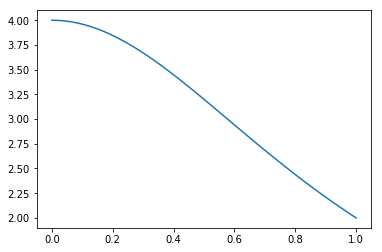

In [75]:
x = np.linspace(a, b, n)
y = list(map(f, x))

plt.plot(x, y)

In [ ]:
def int_Romberg(f, a, b, eps=1e-8):
    
    """
    Aproxima a integral de f em [a, b] pela integral de Simpson.
    """
    
    h = (b - a)/2
    R = (f(a) + f(b))*(b - a)/2  # R(0,0) = R[0][0]

    n = 1
    while True:
        
        h = h/n
        
        R.append([None] * (n + 1))
        
        # Regra do Trapezio
        R[n][0] = = (R[n-1][0])/2 + h*sum([f(a+(2*k-1)*h) for k in range(1, 2**(n-1)+1)])
        
        
        for m in xrange(1, n+1):
            R[n][m] = R[n][m-1] + (R[n][m-1] - R[n-1][m-1]) / (4 ** m - 1)
        print_row(R[n])
        if abs(R[n][n-1] - R[n][n]) < eps:
            return R[n][n]
        n += 1
        